In [ ]:
import pandas as pd
import numpy as np
import os
import time
import random
import gensim
import numpy as np
import os
import torch
from gensim.models import KeyedVectors
from matplotlib import pyplot as plt

## Read profane words

In [ ]:
data_folder = "../Data/Hurtlex_data"

In [ ]:
profane_words_sample = open(data_folder+"/profane_words_sample.txt").read().splitlines()
profane_words = open(data_folder+"/swear_words.txt").read().splitlines()

## read word embeddings

In [ ]:
def get_google_news_embeddings(filename):
    w2v_model = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=True)
    return w2v_model


##word similarity

In [ ]:
w2v_model = get_google_news_embeddings(data_folder+"/GoogleNews-vectors-negative300.bin")

In [ ]:
[i[0] for i in w2v_model.wv.similar_by_word(word='immigrant',topn=10)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


['immigrants',
 'Immigrant',
 'migrant',
 'illegal_immigrant',
 'immigration',
 'Immigrants',
 'Latino_immigrants',
 'undocumented_immigrant',
 'illegal_alien',
 'emigrant']

In [ ]:
w2v_model.wv.similar_by_word(word='nationalist',topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('nationalists', 0.7956784963607788),
 ('nationalistic', 0.7389078140258789),
 ('nationalism', 0.6836102604866028),
 ('ultra_nationalist', 0.6643279194831848),
 ('rightist', 0.6571385860443115),
 ('Nationalist', 0.6401237845420837),
 ('extreme_rightists', 0.6351999044418335),
 ('ethno_nationalist', 0.6333440542221069),
 ('leftist', 0.6221500039100647),
 ('hardline_nationalist', 0.6040586233139038)]

In [ ]:
w2v_model.wv.similar_by_word(word='citizen',topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('citizens', 0.7234383821487427),
 ('Laurianne_Bertrand', 0.5800338983535767),
 ('Osamu_Shimomura_Japanese', 0.5752882957458496),
 ('Passenger_Syed_Jafry', 0.5693572759628296),
 ('taxpaying_citizen', 0.5524572730064392),
 ('citizenship', 0.5337855219841003),
 ('naturalized_citizen', 0.5185316801071167),
 ('Chung_naturalized', 0.5101121664047241),
 ('citzen', 0.5093801021575928),
 ('wallowy_ride', 0.5043033361434937)]

In [ ]:
w2v_model.wv.similar_by_word(word='national',topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('regional', 0.6245444416999817),
 ('international', 0.5092878937721252),
 ('natonal', 0.5025019645690918),
 ('nation', 0.48649129271507263),
 ('Maiolo_Swiss_Italian', 0.4857701063156128),
 ('nationwide', 0.4837099313735962),
 ('country', 0.47806477546691895),
 ('local', 0.4774751663208008),
 ('na_tional', 0.4772682189941406),
 ("nat'l", 0.47458335757255554)]

In [ ]:
for i in profane_words_sample:  
  if i in w2v_model.wv.vocab:
    print({i:w2v_model.wv.similar_by_word(word=i,topn=10)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


{'poop': [('poo', 0.7711512446403503), ('doggy_doo', 0.6559723615646362), ('dog_poop', 0.6548365354537964), ('poops', 0.6491909623146057), ('droppings', 0.6447266340255737), ('poopie', 0.6410250067710876), ('dog_poo', 0.6281640529632568), ('poopy', 0.6250025033950806), ('pee', 0.6221871972084045), ('doo_doo', 0.620962381362915)]}
{'fucks': [('fuck', 0.703389048576355), ('fucking', 0.6630960702896118), ('fucked', 0.6580079197883606), ('f_*_cks', 0.6488926410675049), ('shit', 0.6304110288619995), ('f_*_ck', 0.618228554725647), ('f_*_cking', 0.6142532229423523), ('hahah', 0.6088582873344421), ('dick', 0.6026301383972168), ('sh_*_ts', 0.5982344150543213)]}
{'fanny': [('butt', 0.6340606212615967), ('ass', 0.6304142475128174), ('tuchus', 0.6001905798912048), ('tushy', 0.5936939716339111), ('heinie', 0.5877618789672852), ('hiney', 0.5843818187713623), ('backside', 0.5817444324493408), ('butts', 0.5799529552459717), ('backsides', 0.577180027961731), ('keister', 0.5693553686141968)]}
{'horniest

In [ ]:
hurtlex = pd.read_csv(data_folder+"/Hurtlex.tsv", sep="\t")
hurtlext_train = pd.read_csv(data_folder+"/hurtlex_train.csv")
hurtlext_test = pd.read_csv(data_folder+"/hurtlex_test.csv")

In [ ]:
def find_lexicon_in_WE_vocab(lexicon_word_lst, we_model):
  slur_words_in_WE_vocab = []
  for i in lexicon_word_lst:  
    if i in we_model.wv.vocab:
      slur_words_in_WE_vocab.append(i)
  return slur_words_in_WE_vocab    

In [ ]:
def return_WE_vocab_in_hurtlext_ds (hurtlex_df, word_EM):
  print(hurtlex_df.columns)
  hurtlex_df_ps = hurtlex_df[(hurtlex_df["category"] == "ps")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]
  hurtlex_df_om = hurtlex_df[(hurtlex_df["category"] == "om")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_qas = hurtlex_df[(hurtlex_df["category"] == "qas")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_cds = hurtlex_df[(hurtlex_df["category"] == "cds")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_is = hurtlex_df[(hurtlex_df["category"] == "is")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_re = hurtlex_df[(hurtlex_df["category"] == "re")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_pr = hurtlex_df[(hurtlex_df["category"] == "pr")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_asf = hurtlex_df[(hurtlex_df["category"] == "asf")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_asm = hurtlex_df[(hurtlex_df["category"] == "asm")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "no")]
  hurtlex_df_ddp = hurtlex_df[(hurtlex_df["category"] == "ddp")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]
  hurtlex_df_ddf = hurtlex_df[(hurtlex_df["category"] == "ddf")]["lemma"].unique() #& (hurtlex_df["stereotype"] == "yes")]

  ps_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ps, word_EM)
  om_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_om, word_EM)
  qas_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_qas, word_EM)
  cds_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_cds, word_EM)
  is_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_is, word_EM)
  re_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_re, word_EM)
  pr_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_pr, word_EM)
  asf_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_asf, word_EM)
  asm_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_asm, word_EM)
  ddp_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ddp, word_EM)
  ddf_slur_words_in_UD = find_lexicon_in_WE_vocab(hurtlex_df_ddf, word_EM)

  ps_labels = ["ps" for i in ps_slur_words_in_UD]
  om_labels = ["om" for i in om_slur_words_in_UD]
  qas_labels = ["qas" for i in qas_slur_words_in_UD]
  cds_labels = ["cds" for i in cds_slur_words_in_UD]
  is_labels = ["is" for i in is_slur_words_in_UD]
  re_labels = ["re" for i in re_slur_words_in_UD]
  pr_labels = ["pr" for i in pr_slur_words_in_UD]
  asf_labels = ["asf" for i in asf_slur_words_in_UD]
  asm_labels = ["asm" for i in asm_slur_words_in_UD]
  ddp_labels = ["ddp" for i in ddp_slur_words_in_UD]
  ddf_labels = ["ddf" for i in ddf_slur_words_in_UD]

  ps_target = [0 for i in ps_slur_words_in_UD]
  om_target = [1 for i in om_slur_words_in_UD]
  qas_target = [2 for i in qas_slur_words_in_UD]
  cds_target = [3 for i in cds_slur_words_in_UD]
  is_target = [4 for i in is_slur_words_in_UD]
  re_target = [5 for i in re_slur_words_in_UD]
  pr_target = [6 for i in pr_slur_words_in_UD]
  asf_target = [7 for i in asf_slur_words_in_UD]
  asm_target = [8 for i in asm_slur_words_in_UD]
  ddp_target = [9 for i in ddp_slur_words_in_UD]
  ddf_target = [10 for i in ddf_slur_words_in_UD]


  hurt_lex_dic = {"label":ps_labels + om_labels + qas_labels + cds_labels + is_labels + re_labels + pr_labels + asf_labels + asm_labels + ddp_labels + ddf_labels,
                  "target":ps_target + om_target + qas_target + cds_target + is_target + re_target + pr_target+ asf_target + asm_target + ddp_target + ddf_target,
                  "words":ps_slur_words_in_UD + om_slur_words_in_UD + qas_slur_words_in_UD + cds_slur_words_in_UD + is_slur_words_in_UD + re_slur_words_in_UD + pr_slur_words_in_UD + asf_slur_words_in_UD + asm_slur_words_in_UD + ddp_slur_words_in_UD + ddf_slur_words_in_UD}


  return pd.DataFrame.from_dict(hurt_lex_dic)

In [ ]:
hurtlex_new_df = return_WE_vocab_in_hurtlext_ds(hurtlex, w2v_model)
hurtlex_train = return_WE_vocab_in_hurtlext_ds(hurtlext_train, w2v_model)
hurtlex_test = return_WE_vocab_in_hurtlext_ds(hurtlext_test, w2v_model)

Index(['id', 'pos', 'category', 'stereotype', 'lemma', 'level'], dtype='object')
Index(['Unnamed: 0', 'id', 'pos', 'category', 'stereotype', 'lemma', 'level'], dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'pos', 'category', 'stereotype',
       'lemma', 'level'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


## clustering training and testing hurtlexx

In [ ]:
X_train= w2v_model[hurtlex_train.words]
X_test = w2v_model[hurtlex_test.words]
y_train = hurtlex_train.target
y_test = hurtlex_test.target

In [ ]:
len(X_test)

863

In [ ]:
type(X_test)

numpy.ndarray

## KMEANS evaluation metrics with grounf truth

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

clusterer = KMeans(n_clusters=11).fit(w2v_model[hurtlex_new_df.words])
cluster_labels = clusterer.predict(X_test)
print("Weighted F1-score", metrics.f1_score(y_test,cluster_labels,average=None))
print("Blanaced accuracy",metrics.balanced_accuracy_score(y_test,cluster_labels))
print("Fowlkes Mallows",metrics.fowlkes_mallows_score(y_test,cluster_labels))
print("harmonic mean",metrics.v_measure_score(y_test,cluster_labels))
print("Mutual Information based scores",metrics.adjusted_mutual_info_score(y_test,cluster_labels))
print("Rand Index",metrics.adjusted_rand_score(y_test,cluster_labels))
print("Purity score",purity_score(y_test,cluster_labels))

## KNN with evaluation metrics using GT

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='distance').fit(X_train, y_train)

predictions = knn.predict(X_test)
print("Weighted F1-score", metrics.f1_score(y_test,predictions,average=None))
print("Blanaced accuracy",metrics.balanced_accuracy_score(y_test,predictions))
print("Fowlkes Mallows",metrics.fowlkes_mallows_score(y_test,predictions))
print("harmonic mean",metrics.v_measure_score(y_test,predictions))
print("Mutual Information based scores",metrics.adjusted_mutual_info_score(y_test,predictions))
print("Rand Index",metrics.adjusted_rand_score(y_test,predictions))
print("Purity score",purity_score(y_test,predictions))

Weighted F1-score [0.13445378 0.44444444 0.28930818 0.59335038 0.19047619 0.45454545
 0.5483871  0.         0.23423423 0.15686275 0.11111111]
Blanaced accuracy 0.28756139676553033
Fowlkes Mallows 0.36301348966985625
harmonic mean 0.16886103427054627
Mutual Information based scores 0.14100102721045454
Rand Index 0.15334712958958646
Purity score 0.45654692931633833


In [ ]:
hurtlex_test["w2v_precitions"] = predictions
hurtlex_test.to_csv(data_folder+"/w2v_hurtlex.csv")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.10      0.22      0.13        37
           1       0.44      0.44      0.44        27
           2       0.37      0.24      0.29        96
           3       0.53      0.67      0.59       346
           4       0.29      0.14      0.19        28
           5       0.55      0.39      0.45       103
           6       0.47      0.65      0.55        26
           7       0.00      0.00      0.00        32
           8       0.25      0.22      0.23        60
           9       0.19      0.13      0.16        91
          10       1.00      0.06      0.11        17

    accuracy                           0.42       863
   macro avg       0.38      0.29      0.29       863
weighted avg       0.42      0.42      0.40       863



In [ ]:
ps_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="ps"].words])
om_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="om"].words])
qas_predictions = knn.predict( w2v_model[hurtlex_test[hurtlex_test["label"]=="qas"].words])
cds_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="cds"].words])
is_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="is"].words])
re_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="re"].words])
pr_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="pr"].words])
asf_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="asf"].words])
asm_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="asm"].words])
ddp_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="ddp"].words])
ddf_predictions = knn.predict(w2v_model[hurtlex_test[hurtlex_test["label"]=="ddf"].words])

In [ ]:
fowlkes_mallows_score_cat = [metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
metrics.fowlkes_mallows_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
fowlkes_mallows_score_cat

[0.5155247479663472,
 0.5091750772173156,
 0.5683540408842658,
 0.681128227448173,
 0.5610836076867821,
 0.6342289298253233,
 0.6679474875720741,
 0.4644629225800623,
 0.3832657764100933,
 0.4635689969100769,
 0.701888209634219]

In [ ]:
harmonic_mean_score_cat = [metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
metrics.v_measure_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
harmonic_mean_score_cat

[-2.8595681397557014e-16,
 2.9700571726270073e-16,
 -3.0189473161117306e-16,
 2.244081689362737e-16,
 -8.008197470105128e-17,
 7.860710953479262e-16,
 6.251420748813994e-16,
 3.284724221423065e-17,
 -4.505175907006643e-16,
 1.2824174386456678e-16,
 6.677264330352044e-16]

In [ ]:
purity_score_cat = [purity_score(hurtlex_test[hurtlex_test["label"]=="ps"].target,ps_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="om"].target,om_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="qas"].target,qas_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="cds"].target,cds_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="is"].target,is_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="re"].target,re_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="pr"].target,pr_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="asf"].target,asf_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="asm"].target,asm_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="ddp"].target,ddp_predictions),
purity_score(hurtlex_test[hurtlex_test["label"]=="ddf"].target,ddf_predictions)]

In [ ]:
purity_score_cat

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## plot tsne of hurtlext df new

In [ ]:
images_folder = "/content/drive/My Drive/Colab Notebooks/Cyberbullying_WE_intrinsic_analysis/images"

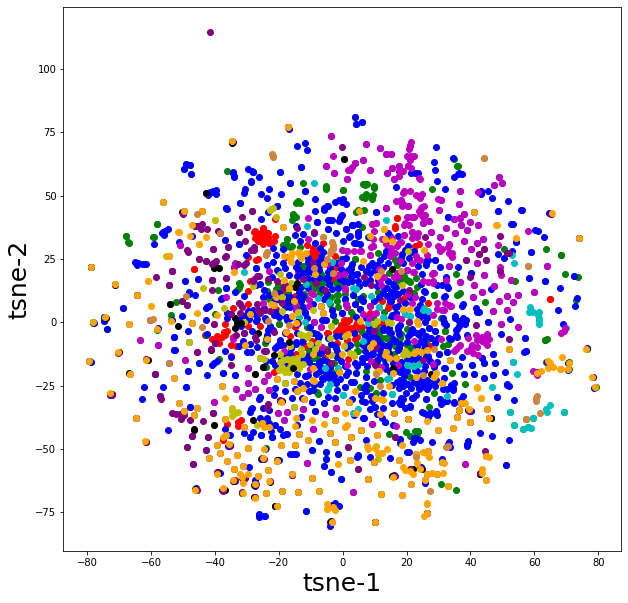

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(w2v_model[hurtlex_new_df.words])

target_ids = range(1,len(hurtlex_new_df.label))


fig = plt.figure(figsize=(10,10))
colors = 'r', 'g', 'b', 'c', 'm', 'y','k','purple', 'orange','peru','lime',
for i, c, l in zip(target_ids, colors, hurtlex_new_df.label.unique()):
    plt.scatter(X_2d[hurtlex_new_df.target == i, 0], X_2d[hurtlex_new_df.target == i, 1], c=c, label=l)
    #plt.title("Distribution of Word2Vec-News embeddings of the words in different cateogries in the Hurtlex offensive lexicon", fontsize=14)
    plt.xlabel("tsne-1", fontsize=25)
    plt.ylabel("tsne-2", fontsize=25)

#plt.legend(bbox_to_anchor=(1., 1.03),fontsize=25)

fig.savefig(images_folder+"/w2v_tsne.eps", format='eps',bbox_inches='tight')            

## Silhoutte score

For n_clusters = 11 The average silhouette_score is : -0.21371944


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

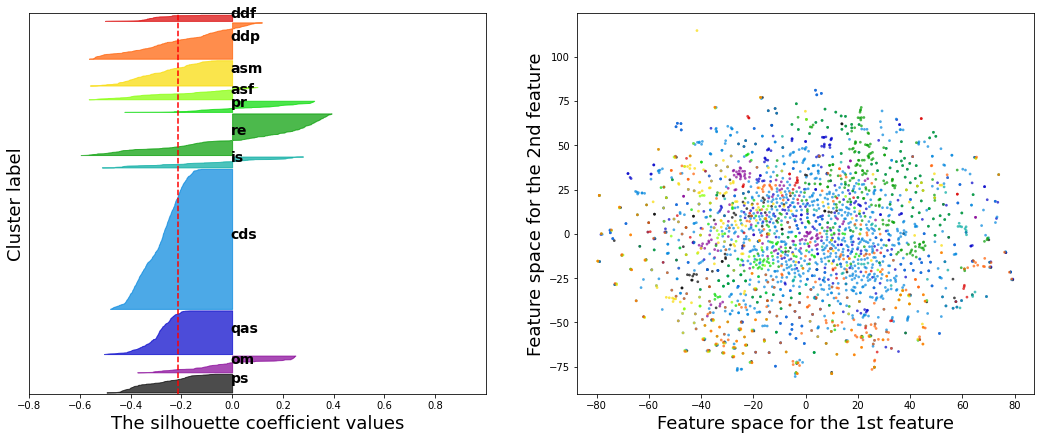

In [ ]:
def plot_silhouette_clusters(X_2d, cluster_labels_num,cluster_labels_str,range_n_clusters):
  import matplotlib.cm as cm
  from sklearn import metrics
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X_2d) + (n_clusters + 1) * 10])
      silhouette_avg = metrics.silhouette_score(X_2d, cluster_labels_num)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = metrics.silhouette_samples(X_2d, cluster_labels_num)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels_num == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.005, y_lower + 0.5 * size_cluster_i, cluster_labels_str[i],fontsize=14, fontweight='bold')

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      #ax1.set_title("The silhouette plot for the various clusters.", fontsize=18)
      ax1.set_xlabel("The silhouette coefficient values",fontsize=18)
      ax1.set_ylabel("Cluster label", fontsize=18)

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.8,-0.6,-0.4,-0.2, 0, 0.2, 0.4,0.6,0.8])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels_num.astype(float) / n_clusters)
      ax2.scatter(X_2d[:, 0], X_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')
      # Labeling the clusters
     #centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                #  c="white", alpha=1, s=200, edgecolor='k')

     # for i, c in enumerate(centers):
      #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
       #               s=50, edgecolor='k')

      #ax2.set_title("The visualization of the clustered data.", fontsize=18)
      ax2.set_xlabel("Feature space for the 1st feature", fontsize=18)
      ax2.set_ylabel("Feature space for the 2nd feature", fontsize=18)

      #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                 #   "with n_clusters = %d" % n_clusters),
                  #fontsize=18, fontweight='bold')
  return plt

plt = plot_silhouette_clusters(X_2d, hurtlex_df.target, hurtlex_df.label.unique(),[11])
plt.savefig(images_folder+"/w2v_silhoutte_clusters.eps", format='eps',bbox_inches='tight')     


For n_clusters = 11 The average silhouette_score is : -0.21371944


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

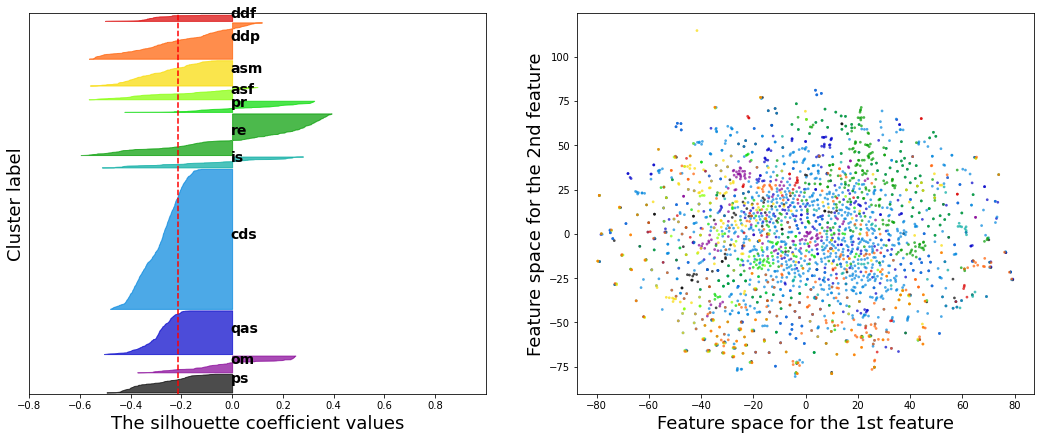

In [ ]:
plot_silhouette_clusters(X_2d, hurtlex_df.target, hurtlex_df.label.unique(),[11])

## Silhoute scores for KNN clustering of the embeddings

For n_clusters = 3 The average silhouette_score is : 0.34573534


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


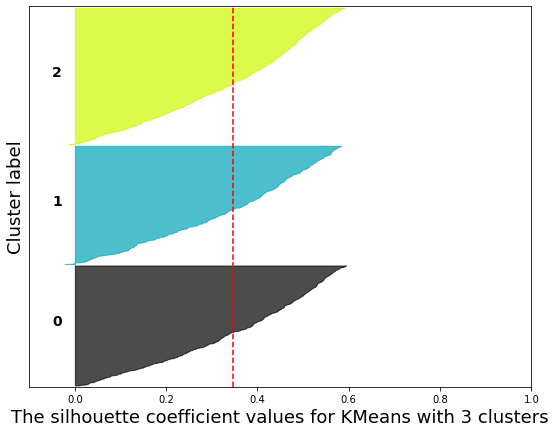

In [ ]:
def plot_silhouette_KNN_clusters(X,range_n_clusters):
  import matplotlib.cm as cm
  from sklearn import metrics
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_samples, silhouette_score

  for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),fontsize=14, fontweight='bold')

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values for KMeans with 3 clusters", fontsize=18)
    ax1.set_ylabel("Cluster label", fontsize=18)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
   # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
           #     c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
  #  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
          #      c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
        #ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
              #      s=50, edgecolor='k')
#
    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature", fontsize=18)
    #ax2.set_ylabel("Feature space for the 2nd feature", fontsize=18)

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
            #      "with n_clusters = %d" % n_clusters),
             #    fontsize=14, fontweight='bold')
    return plt

plot_silhouette_KNN_clusters(X_2d,[3])
plt.savefig(images_folder+"/w2v_silhoutte_clusters_Kmeans_3.eps", format='eps',bbox_inches='tight') 

For n_clusters = 2 The average silhouette_score is : 0.32839864
For n_clusters = 3 The average silhouette_score is : 0.34573534
For n_clusters = 4 The average silhouette_score is : 0.34355143
For n_clusters = 5 The average silhouette_score is : 0.33141372
For n_clusters = 6 The average silhouette_score is : 0.3405898
For n_clusters = 7 The average silhouette_score is : 0.34233838
For n_clusters = 8 The average silhouette_score is : 0.33640355
For n_clusters = 9 The average silhouette_score is : 0.33308512
For n_clusters = 10 The average silhouette_score is : 0.34269327
For n_clusters = 11 The average silhouette_score is : 0.34012228


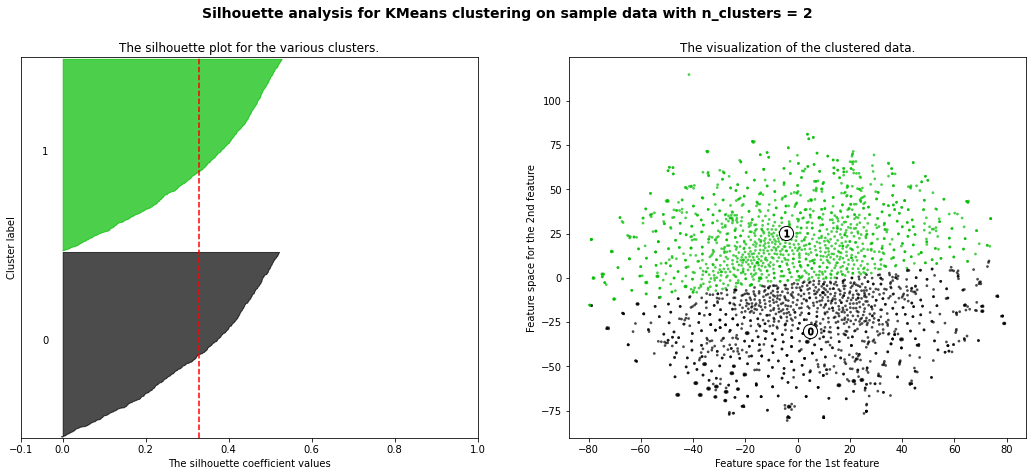

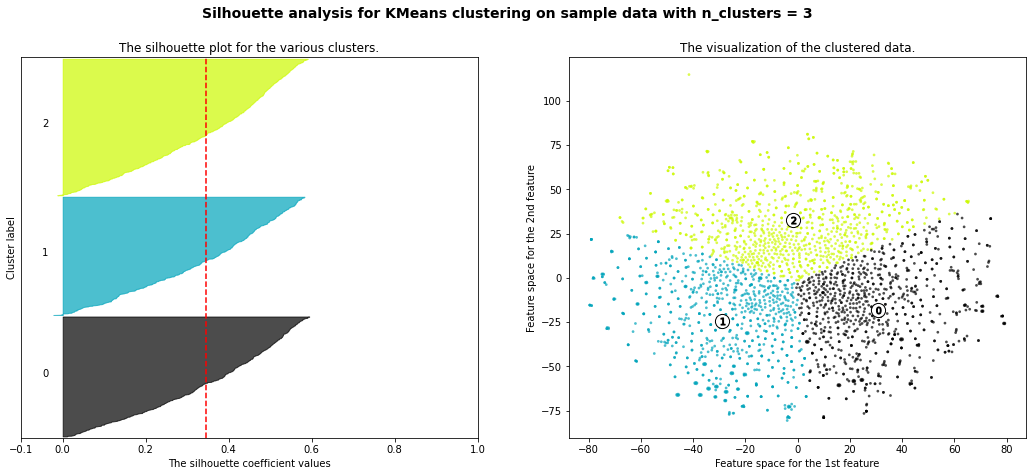

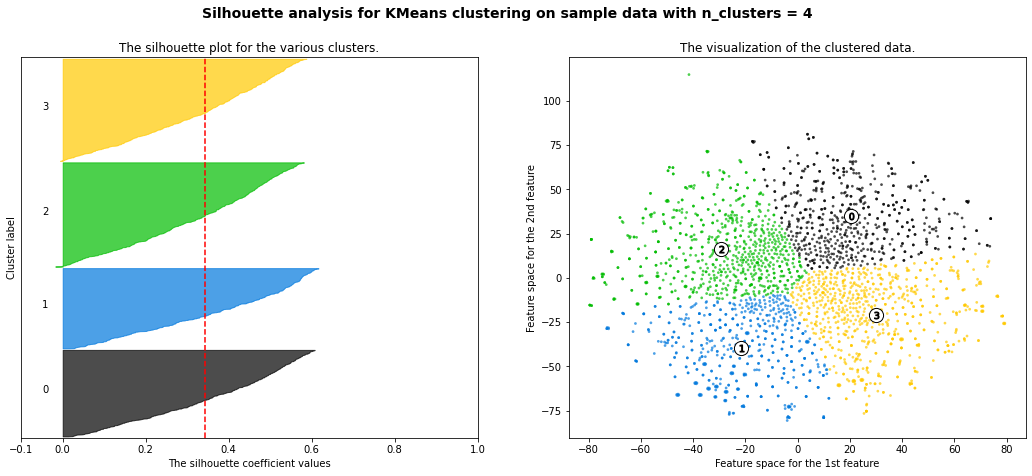

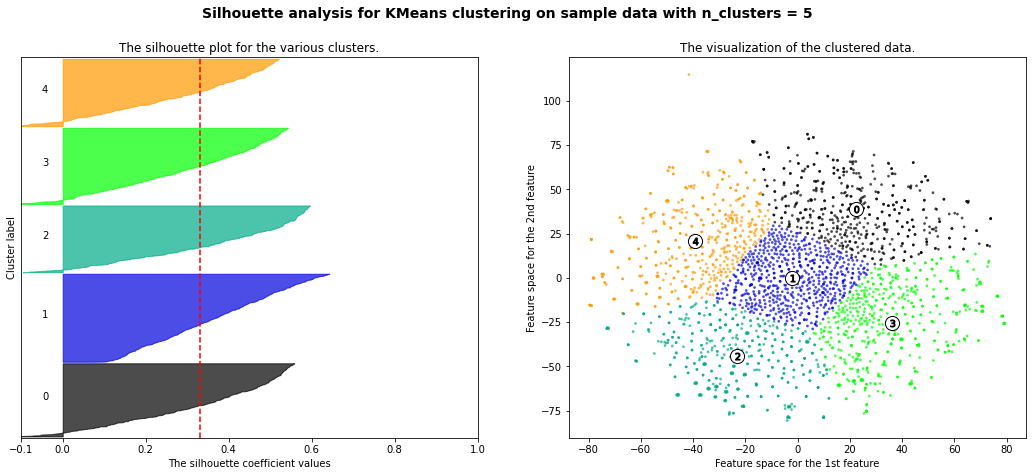

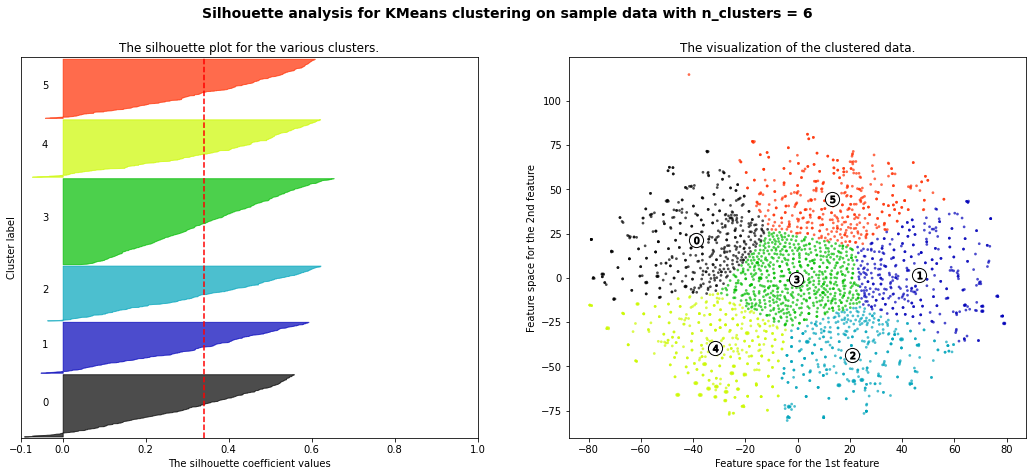

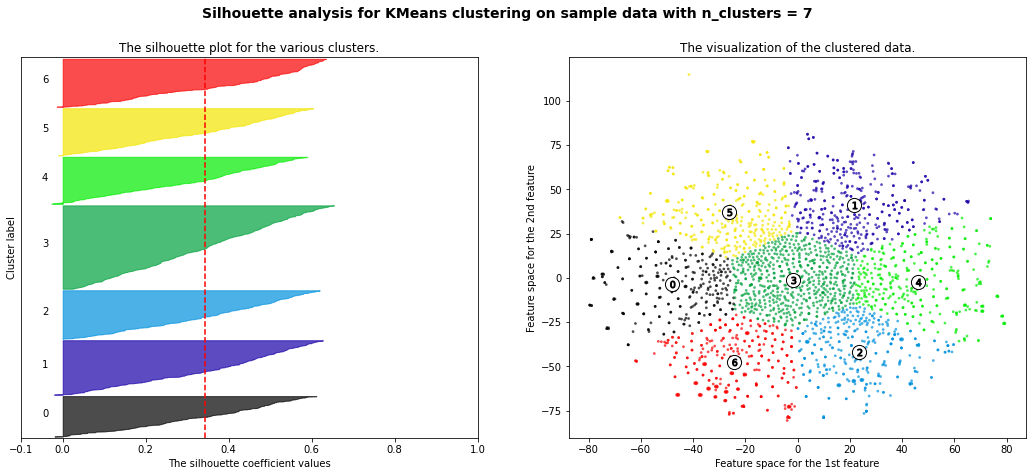

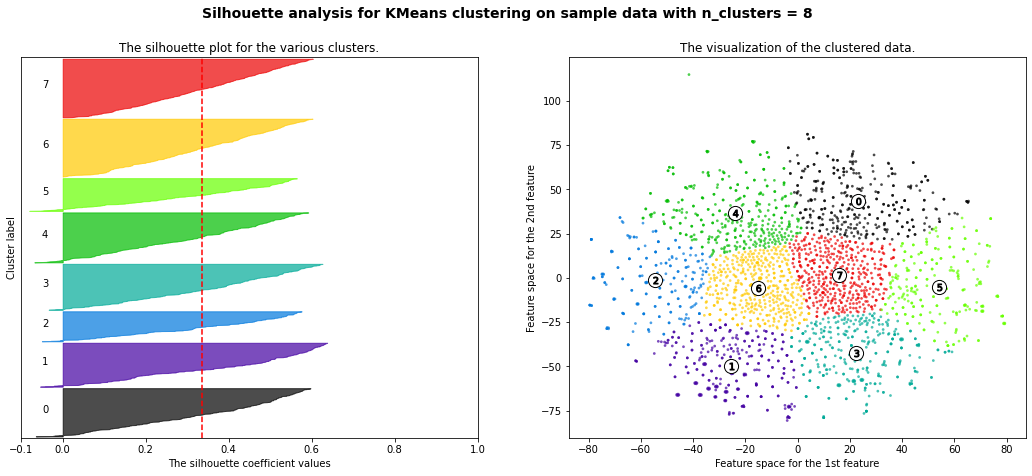

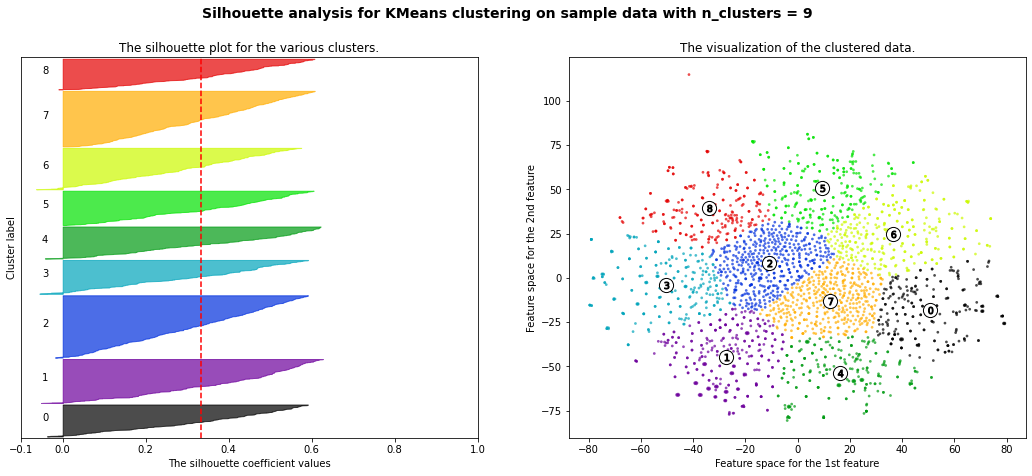

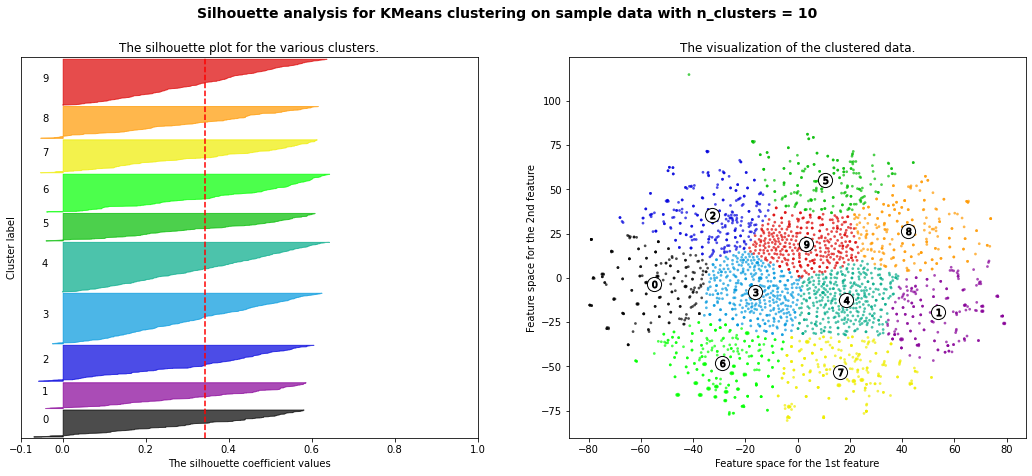

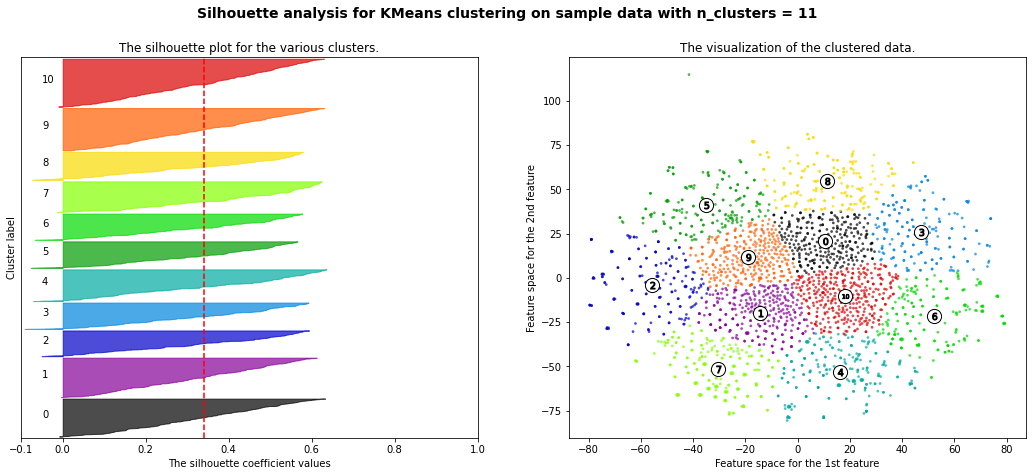

In [ ]:
plot_silhouette_KNN_clusters(X_2d,[3])

## TExt similarity

In [ ]:
def hurt_lex_category_similarities(words_list, model,category,ax):
  from itertools import combinations
  ps_all_pairs = combinations(words_list, 2)  
  ps_scored_pairs = [(model.wv.similarity(p[0], p[1]), p)
                for p in ps_all_pairs]
  ps_sorted_pairs = sorted(ps_scored_pairs, reverse=True)
  ps_similairty_scores = []
  for i in ps_sorted_pairs:
    ps_similairty_scores.append(i[0])
  print(np.mean(ps_similairty_scores))
  ax.hist(ps_similairty_scores)  
  ax.set_title(category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


0.19350095
0.18223283
0.26340428
0.16078822
0.12799111
0.14778641
0.19254908
0.25426182
0.19470614
0.23510872
0.14667976


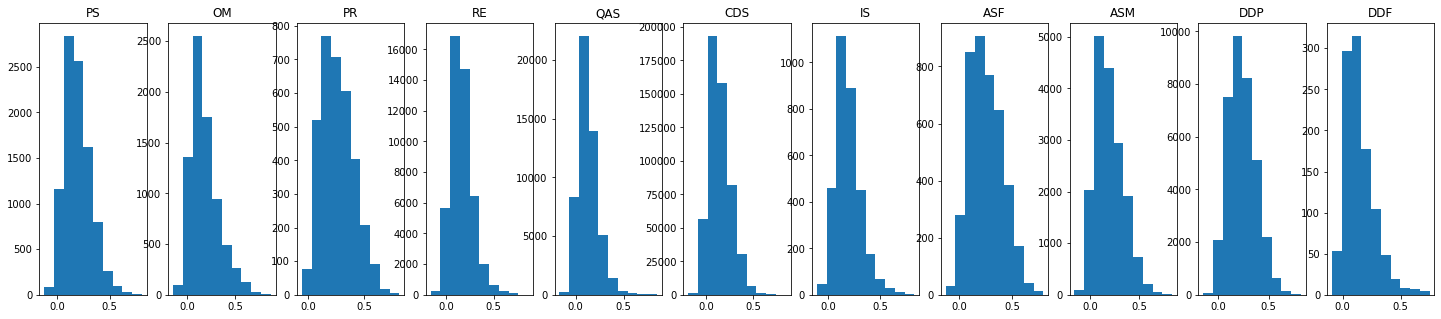

In [ ]:
fig, axs = plt.subplots(figsize=(25,5),ncols=11)
hurt_lex_category_similarities(ps_slur_words_in_w2v, w2v_model, "PS", axs[0])
hurt_lex_category_similarities(om_slur_words_in_w2v, w2v_model, "OM", axs[1])
hurt_lex_category_similarities(pr_slur_words_in_w2v, w2v_model, "PR", axs[2])
hurt_lex_category_similarities(re_slur_words_in_w2v, w2v_model, "RE", axs[3])
hurt_lex_category_similarities(qas_slur_words_in_w2v, w2v_model, "QAS", axs[4])
hurt_lex_category_similarities(cds_slur_words_in_w2v, w2v_model, "CDS", axs[5])
hurt_lex_category_similarities(is_slur_words_in_w2v, w2v_model, "IS", axs[6])
hurt_lex_category_similarities(asf_slur_words_in_w2v, w2v_model, "ASF", axs[7])
hurt_lex_category_similarities(asm_slur_words_in_w2v, w2v_model, "ASM", axs[8])
hurt_lex_category_similarities(ddp_slur_words_in_w2v, w2v_model, "DDP", axs[9])
hurt_lex_category_similarities(ddf_slur_words_in_w2v, w2v_model, "DDF", axs[10])


In [ ]:
def hurt_lex_category_similarities_file(words_list, model,category, file_path,model_name):
  from itertools import combinations
  ps_all_pairs = combinations(words_list, 2)  
  ps_scored_pairs = [(model.wv.similarity(p[0], p[1]), p)
              for p in ps_all_pairs]
  ps_sorted_pairs = sorted(ps_scored_pairs, reverse=True)
  np.savetxt(file_path+"/"+model_name+"_"+category+"_word_similarity.txt",ps_sorted_pairs,fmt="%s",delimiter=',')

results_folder = "/content/drive/My Drive/Colab Notebooks/Cyberbullying_WE_intrinsic_analysis/Results"

hurt_lex_category_similarities_file(ps_slur_words_in_w2v, w2v_model, "PS", results_folder, "w2v_model")
hurt_lex_category_similarities_file(om_slur_words_in_w2v, w2v_model, "OM", results_folder,"w2v_model")
hurt_lex_category_similarities_file(pr_slur_words_in_w2v, w2v_model, "PR", results_folder,"w2v_model")
hurt_lex_category_similarities_file(re_slur_words_in_w2v, w2v_model, "RE", results_folder,"w2v_model")
hurt_lex_category_similarities_file(qas_slur_words_in_w2v, w2v_model, "QAS", results_folder,"w2v_model")
hurt_lex_category_similarities_file(cds_slur_words_in_w2v, w2v_model, "CDS", results_folder,"w2v_model")
hurt_lex_category_similarities_file(is_slur_words_in_w2v, w2v_model, "IS", results_folder,"w2v_model")
hurt_lex_category_similarities_file(asf_slur_words_in_w2v, w2v_model, "ASF", results_folder,"w2v_model")
hurt_lex_category_similarities_file(asm_slur_words_in_w2v, w2v_model, "ASM", results_folder,"w2v_model")
hurt_lex_category_similarities_file(ddp_slur_words_in_w2v, w2v_model, "DDP", results_folder,"w2v_model")
hurt_lex_category_similarities_file(ddf_slur_words_in_w2v, w2v_model, "DDF", results_folder,"w2v_model")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
